# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) 
# Pandas for Exploratory Data Analysis I 
by [@josephofiowa](https://twitter.com/josephofiowa) and _updated B Rhodes (DC)_

Pandas is the most prominent Python library for exploratory data analysis (EDA). The functions Pandas supports are integral to understanding, formatting, and preparing our data. Formally, we use Pandas to investigate, wrangle, munge, and clean our data. Pandas is the Swiss Army Knife of data manipulation!


We'll have two coding-heavy sessions on Pandas. In this one, we'll use Pandas to:
 - Read in a dataset
 - Investigate a dataset's integrity
 - Filter, sort, and manipulate a DataFrame's series

## About the Dataset: Adventureworks Cycles

<img align="right" src="http://lh6.ggpht.com/_XjcDyZkJqHg/TPaaRcaysbI/AAAAAAAAAFo/b1U3q-qbTjY/AdventureWorks%20Logo%5B5%5D.png?imgmax=800">

For today's Pandas exercises, we will be using a dataset developed by Microsoft for training purposes in SQL server, known the [Adventureworks Cycles 2014OLTP Database](https://github.com/Microsoft/sql-server-samples/releases/tag/adventureworks). It is based on a fictitious company called Adventure Works Cycles (AWC), a multinational manufacturer and seller of bicycles and accessories. The company is based in Bothell, Washington, USA and has regional sales offices in several countries. We will be looking at a single table from this database, the Production.Product table, which outlines some of the products this company sells. 

A full data dictionary can be viewed [here](https://www.sqldatadictionary.com/AdventureWorks2014/).


Let's take a closer look at the Production.Product table [data dictionary](https://www.sqldatadictionary.com/AdventureWorks2014/Production.Product.html), which is a description of the fields (columns) in the table (the .csv file we will import below):
- **ProductID** - Primary key for Product records.
- **Name** - Name of the product.
- **ProductNumber** - Unique product identification number.
- **MakeFlag** - 0 = Product is purchased, 1 = Product is manufactured in-house.
- **FinishedGoodsFlag** - 0 = Product is not a salable item. 1 = Product is salable.
- **Color** - Product color.
- **SafetyStockLevel** - Minimum inventory quantity.
- **ReorderPoint** - Inventory level that triggers a purchase order or work order.
- **StandardCost** - Standard cost of the product.
- **ListPrice** - Selling price.
- **Size** - Product size.
- **SizeUnitMeasureCode** - Unit of measure for the Size column.
- **WeightUnitMeasureCode** - Unit of measure for the Weight column.
- **DaysToManufacture** - Number of days required to manufacture the product.
- **ProductLine** - R = Road, M = Mountain, T = Touring, S = Standard
- **Class** - H = High, M = Medium, L = Low
- **Style** - W = Womens, M = Mens, U = Universal
- **ProductSubcategoryID** - Product is a member of this product subcategory. Foreign key to ProductSubCategory.ProductSubCategoryID.
- **ProductModelID** - Product is a member of this product model. Foreign key to ProductModel.ProductModelID.
- **SellStartDate** - Date the product was available for sale.
- **SellEndDate** - Date the product was no longer available for sale.
- **DiscontinuedDate** - Date the product was discontinued.
- **rowguid** - ROWGUIDCOL number uniquely identifying the record. Used to support a merge replication sample.
- **ModifiedDate** - Date and time the record was last updated.


You may need to install pandas and matplotlib before starting.

In [ ]:
conda install pandas -y

In [62]:
conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alsa-lib-1.2.8             |       h166bdaf_0         578 KB  conda-forge
    attr-2.5.1                 |       h166bdaf_1          69 KB  conda-forge
    brotli-1.0.9               |       h166bdaf_8          18 KB  conda-forge
    brotli-bin-1.0.9           |       h166bdaf_8          20 KB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    contourpy-1.0.7            |   py39h4b4f3f3_0         

## Importing Pandas

To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

In [63]:
import pandas as pd

In [64]:
# we can see the details about the imported package by referencing its private class propertys:
print(f'I am using {pd.__name__} \
Version: {pd.__version__}.\n\
It is installed at: {pd.__path__}')

I am using pandas Version: 1.4.2.
It is installed at: ['/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pandas']


## Reading in Data

Pandas dramatically simplifies the process of reading in data. When we say "reading in data," we mean loading a file into our machine's memory.

When you have a CSV, for example, and then you double-click to open it in Microsoft Excel, the open file is "read into memory." You can now manipulate the CSV.

When we read data into memory in Python, we are creating an object. We will soon explore this object. _(And, as an aside, when we have a file that is greater than the size of our computer's memory, this is approaching "Big Data.")_

Because we are working with a CSV, we will use the [read CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method.<br>A [delimiter](https://en.wikipedia.org/wiki/Delimiter-separated_values) is a character that separates fields (columns) in the imported file. Just because a file says `.csv` does not necessarily mean that a comma is used as the delimiter. In this case, we have a tab character as the delimiter for our columns, so we will be using `sep='\t'` to tell pandas to 'cut' the columns every time it sees a [tab character in the file](http://vim.wikia.com/wiki/Showing_the_ASCII_value_of_the_current_character).

In [65]:
# Set the URL for the dataset
url = 'https://raw.githubusercontent.com/python-machine-learning-apps/intro-to-pandas/main/data/Production.Product.csv'

In [66]:
# read the dataset as a DataFrame into a variable named 'prod'
prod_df = pd.read_csv(url, sep='\t')

In [67]:
# show the head of this dataset
prod_df.sample(7)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
330,826,LL Road Rear Wheel,RW-R623,1,1,Black,500,375,49.9789,112.565,...,R,L,NaN,17.0,126.0,2012-05-30 00:00:00,2013-05-29 00:00:00,NaN,{78D01117-8DCD-465F-9DC7-94A2CDC35582},2014-02-08 10:01:36.827000000
98,420,Internal Lock Washer 8,LI-7160,0,0,NaN,1000,750,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E2F03586-02E8-4CD9-A342-1A8D65D393BD},2014-02-08 10:01:36.827000000
7,319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
132,454,Lock Nut 21,LN-5818,0,0,NaN,1000,750,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E10A7B34-87F5-42CD-88B3-27A3D8E16B18},2014-02-08 10:01:36.827000000
427,923,Touring Tire Tube,TT-T092,0,1,NaN,500,375,1.8663,4.990,...,T,NaN,NaN,37.0,94.0,2013-05-30 00:00:00,NaN,NaN,{179FEC38-CAB5-4A47-BCFF-31CFC9E43A3C},2014-02-08 10:01:36.827000000
197,525,LL Shell,SH-4562,0,0,NaN,800,600,0.0000,0.000,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{AE7BCDA7-E836-4F68-9E61-745F27F9AA3E},2014-02-08 10:01:36.827000000
151,473,Lock Washer 9,LW-7160,0,0,NaN,1000,750,0.0000,0.000,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F9426FB2-1E68-464E-BF32-615026E0249E},2014-02-08 10:01:36.827000000


*Documentation Pause*

How did we know how to use `pd.read_csv`? Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). Note the first argument required (`filepath`).
> Take a moment to dissect other arguments and options when reading in data.

We have just created a data structure called a `DataFrame`. See?

In [68]:
# show the type of this 'prod' dataset
type(prod_df)

pandas.core.frame.DataFrame

## Inspecting our DataFrame: The basics

We'll now perform basic operations on the DataFrame, denoted with comments.

We'll use a few basic commands to quickly size up our data. 

- `.info()` - gives the number of rows and columns as well as the datatype for each column.
- `.describe()` - gives a summary statistics (e.g. mean, count, median and other percentiles)
- `.dtypes` - gives the datatypes of each column
- `.shape` - gives the number of rows and columns in a dataframe
- `.head(n)` & `.tail(n)` - displays the first or last `n` rows of a dataframe.

*Note you'll often see commands written as `df.Method()` or `df.Attribute` commands with () are methods or functions. With no parentheses they are attributes. A method does something; it performs some action. An attribute is a value or characterstic. Attributes do not perform any actions. I'll point these out as we go, but remember this difference.*

**Exercise** display the first 5 rows of the dataset. Type out the command, but before you run it use ```shift-tab``` to view the docstring.

In [69]:
# Take a quick look to verify the data is what we expect. Display the first 5 rows. 
# Use the simplest form of the method possible.
prod_df.head().T

,0,1,2,3,4
ProductID,1,2,3,4,316
Name,Adjustable Race,Bearing Ball,BB Ball Bearing,Headset Ball Bearings,Blade
ProductNumber,AR-5381,BA-8327,BE-2349,BE-2908,BL-2036
MakeFlag,0,0,1,0,1
FinishedGoodsFlag,0,0,0,0,0
Color,NaN,NaN,NaN,NaN,NaN
SafetyStockLevel,1000,1000,800,800,800
ReorderPoint,750,750,600,600,600
StandardCost,0.0,0.0,0.0,0.0,0.0
ListPrice,0.0,0.0,0.0,0.0,0.0


In [70]:
# last 3 rows - note we can also transpose the display so we aren't horizontally scrolling.
# this applies to .head() as well.

prod_df.tail(3).T


,501,502,503
ProductID,997,998,999
Name,"Road-750 Black, 44","Road-750 Black, 48","Road-750 Black, 52"
ProductNumber,BK-R19B-44,BK-R19B-48,BK-R19B-52
MakeFlag,1,1,1
FinishedGoodsFlag,1,1,1
Color,Black,Black,Black
SafetyStockLevel,100,100,100
ReorderPoint,75,75,75
StandardCost,343.6496,343.6496,343.6496
ListPrice,539.99,539.99,539.99


**Class Question:** 
- What do you think transpose is doing? Does it change the data?

###### `.info()`

`.info()` provides detailed information on the dataframe. It shows:

- number of rows
- number of columns
- type of Index
- datatype of each column
- column names
- count of non-null values in each column

In [71]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductID              504 non-null    int64  
 1   Name                   504 non-null    object 
 2   ProductNumber          504 non-null    object 
 3   MakeFlag               504 non-null    int64  
 4   FinishedGoodsFlag      504 non-null    int64  
 5   Color                  256 non-null    object 
 6   SafetyStockLevel       504 non-null    int64  
 7   ReorderPoint           504 non-null    int64  
 8   StandardCost           504 non-null    float64
 9   ListPrice              504 non-null    float64
 10  Size                   211 non-null    object 
 11  SizeUnitMeasureCode    176 non-null    object 
 12  WeightUnitMeasureCode  205 non-null    object 
 13  Weight                 205 non-null    float64
 14  DaysToManufacture      504 non-null    int64  
 15  Produc

###### `.shape`

`.shape` simply gives us the number of rows and columns. It returns a tuple of the form `(row, column).`


In [72]:
# identify the shape (rows by columns)
prod_df.shape

(504, 25)

Here we have 504 rows, and 25 columns. This is a tuple, so we can extract the parts using indexing:

In [73]:
# print the number of rows - we can access it just like indexing a list or tuple.
prod_df.shape[1]

25

## Using the index
An [index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html) is an immutable ndarray implementing an ordered, sliceable set. It is the basic object storing axis labels for all pandas objects. Think of it as a 'row address' for your data frame (table). It is best practice to explicitly set the index of your dataframe, as these are commonly used as [primary keys](https://en.wikipedia.org/wiki/Primary_key) which can be used to [join](https://www.w3schools.com/sql/sql_join.asp) your dataframe to other dataframes.

The dataframe can store different types (int, string, datetime), and when importing data will automatically assign a number to each row, starting at zero and counting up. You can overwrite this, which is what we are going to do.

In [74]:
prod_df.head()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000
4,316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E73E9750-603B-4131-89F5-3DD15ED5FF80},2014-02-08 10:01:36.827000000


We imported the data without specifying an index, so Pandas autogenerated one. In the future you'll see examples where the index is specified explicitly in the data and we can tell Pandas to use that.

In [75]:
# display the index as imported (auto-generated upon import)
prod_df.index

RangeIndex(start=0, stop=504, step=1)

In [76]:
# note that our auto-generated index has no name
print(prod_df.index.name)

None


In [77]:
# Here we are looking at two data columns plus the index;
# the one on the left is the index (automatically generated upon import by pandas)
# 'ProductID' is our PK (primary key) from our imported table. 'Name' is a data column.
# Notice that the generated index starts at zero and our PK starts at 1.
prod_df[['ProductID', 'Name']].head(6)

,ProductID,Name
0,1,Adjustable Race
1,2,Bearing Ball
2,3,BB Ball Bearing
3,4,Headset Ball Bearings
4,316,Blade
5,317,LL Crankarm


In [78]:
prod_df[['ProductID', 'Name', 'Color']].head(6)

,ProductID,Name,Color
0,1,Adjustable Race,NaN
1,2,Bearing Ball,NaN
2,3,BB Ball Bearing,NaN
3,4,Headset Ball Bearings,NaN
4,316,Blade,NaN
5,317,LL Crankarm,Black


In [79]:
# Setting the index overwrites the automatically generated index
# with our PK, which resided in the 'ProductID' column.

prod_df.set_index('ProductID', inplace=True)
prod_df.head(3)[['Name']]

,Name
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing


In [80]:
# Note how our index property has changed as a result
prod_df.index

Int64Index([  1,   2,   3,   4, 316, 317, 318, 319, 320, 321,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', name='ProductID', length=504)

In [81]:
# And our index has also inherited the name of our 'ProductID' column
prod_df.index.name

'ProductID'

## Column headers and datatypes

In [82]:
# print the columns
prod_df.columns

Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [83]:
# examine the datatypes of the columns
# note that these were automatically inferred by pandas upon import!
prod_df.dtypes

Name                      object
ProductNumber             object
MakeFlag                   int64
FinishedGoodsFlag          int64
Color                     object
SafetyStockLevel           int64
ReorderPoint               int64
StandardCost             float64
ListPrice                float64
Size                      object
SizeUnitMeasureCode       object
WeightUnitMeasureCode     object
Weight                   float64
DaysToManufacture          int64
ProductLine               object
Class                     object
Style                     object
ProductSubcategoryID     float64
ProductModelID           float64
SellStartDate             object
SellEndDate               object
DiscontinuedDate         float64
rowguid                   object
ModifiedDate              object
dtype: object

In [84]:
# Note the output of .dtypes is a Pandas Series.
type(prod_df.dtypes)

pandas.core.series.Series

In [85]:
# an alternative view as a DataFrame.
# Here we use the pd.DataFrame construct to generate a new dataframe.
# use the shift-tab trick to see look at the docstring to see how this method works 
pd.DataFrame(prod_df.dtypes, columns=['DataType'])

,DataType
Name,object
ProductNumber,object
MakeFlag,int64
FinishedGoodsFlag,int64
Color,object
SafetyStockLevel,int64
ReorderPoint,int64
StandardCost,float64
ListPrice,float64
Size,object


### **Class Question:** 
Why do datatypes matter? What operations could we perform on some datatypes that we could not on others? Note the importance of this in checking dataset integrity.

## Selecting a Column

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

In [86]:
# Select a single column to display will output a Pandas Series.
prod_df[['Name', 'Color']]

,Name,Color
ProductID,,
1,Adjustable Race,NaN
2,Bearing Ball,NaN
3,BB Ball Bearing,NaN
4,Headset Ball Bearings,NaN
316,Blade,NaN
...,...,...
995,ML Bottom Bracket,NaN
996,HL Bottom Bracket,NaN
997,"Road-750 Black, 44",Black


In [87]:
prod_df['Color']

ProductID
1        NaN
2        NaN
3        NaN
4        NaN
316      NaN
       ...  
995      NaN
996      NaN
997    Black
998    Black
999    Black
Name: Color, Length: 504, dtype: object

We can also reference a specific column using dot notation in the form `df.ColumnName`. Or in our example:
- `prod_df.Name` will display the column as a Pandas Series.

**HINT:** I don't recommend the dot construct `df.ColumnName` because there are cases where it will not work.

**Question**: Under what circumstances might this format not work?

In [88]:
# We can also reference a specific column with 
prod_df.Name

ProductID
1            Adjustable Race
2               Bearing Ball
3            BB Ball Bearing
4      Headset Ball Bearings
316                    Blade
               ...          
995        ML Bottom Bracket
996        HL Bottom Bracket
997       Road-750 Black, 44
998       Road-750 Black, 48
999       Road-750 Black, 52
Name: Name, Length: 504, dtype: object

In [89]:
# Using double brackets will output a Pandas Dataframe
# Note: to output more than one column you always must use double brackets. See below.
prod_df[['Name']]

,Name
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing
4,Headset Ball Bearings
316,Blade
...,...
995,ML Bottom Bracket
996,HL Bottom Bracket
997,"Road-750 Black, 44"


In [90]:
# Use double brackets to show two or more columns in a dataframe
prod_df[['Name', 'Color', 'ProductModelID']].head(3)


,Name,Color,ProductModelID
ProductID,,,
1,Adjustable Race,NaN,NaN
2,Bearing Ball,NaN,NaN
3,BB Ball Bearing,NaN,NaN


In [91]:
# show the difference in data types by using single and double square brackets
print(type(prod_df['Name']))
print(type(prod_df[['Name']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [92]:
# Often it's easier to define a list with the column names you want to use.
alist = ['Name', 'Color']
prod_df[alist].head(2)

,Name,Color
ProductID,,
1,Adjustable Race,NaN
2,Bearing Ball,NaN


**Class Question:** What if we wanted to select a column that has a space in it? Which method from the above two would we use? Why?

## Renaming Columns

Perhaps we want to rename our columns. There are a few options for doing this.

Rename the columns all the columns or a subset of columns using either a list-based approach or a dictionary based approach.

Here we use a list to rename all the columns.

Note that the `pd.DataFrame.columns` property can be cast to a `list` type. Originally, it's a `pd.core.indexes.base.Index` object:

In [93]:
# create a new dataframe for demonstration purposes and look at the column names
new_df = prod_df[['Name', 'Color', 'ProductModelID']]
new_df.columns

Index(['Name', 'Color', 'ProductModelID'], dtype='object')

In [94]:
# rename the columns to be lower case 
# this is a common use case for list comprehensions - changing column names
column_names = [col.lower() for col in new_df.columns]
column_names

['name', 'color', 'productmodelid']

In [95]:
new_df.columns = column_names

new_df.head(2)

,name,color,productmodelid
ProductID,,,
1,Adjustable Race,NaN,NaN
2,Bearing Ball,NaN,NaN


We can explicitly cast these to a list object as such, by using the built-in `list()` function:

In [96]:
# Note that .columns are not list objects
list(new_df.columns)

['name', 'color', 'productmodelid']

We can also use the list approach to rename some, but not all the columns. 


In [97]:
column_names[0] = 'NAME'
column_names

['NAME', 'color', 'productmodelid']

In [98]:
new_df.columns = column_names
new_df.head(2)

,NAME,color,productmodelid
ProductID,,,
1,Adjustable Race,NaN,NaN
2,Bearing Ball,NaN,NaN


We can also rename **specific** columns by using a dictionary and the `.rename()` method:

In [99]:
# rename one or more columns with a dictionary. Note: inplace=False will return a new dataframe,
# but leave the original dataframe untouched. Change this to True to modify the original dataframe.

rename_dict = {'Name': 'ProductName', 'ProductNumber':'Number'}
rename_dict

{'Name': 'ProductName', 'ProductNumber': 'Number'}

In [100]:
# use the rename method
new_prod_df = prod_df.rename(columns=rename_dict, inplace=False)

new_prod_df.head(3)

,ProductName,Number,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


In [101]:
prod_df.head(3)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


## Common Column Operations

While this is non-comprehensive, these are a few key column-specific data checks.


**Descriptive statistics:**  the minimum, first quartile, median, third quartile, and maximum.

(And more! The mean too.)

Five Number Summary (all assumes numeric data):
- **Min:** The smallest value in the column
- **Max:** The largest value in the column
- **Quartile:** A quartile is one fourth of our data
    - **First quartile:** This is the bottom most 25 percent
    - **Median:** The middle value. (Line all values biggest to smallest - median is the middle!) Also the 50th percentile
    - **Third quartile:** This the the top 75 percentile of our data


![](https://www.mathsisfun.com/data/images/quartiles-a.svg)

In [102]:
# note - .describe() *default* only checks numeric datatypes
# It will ignore non-numerical data

prod_df.describe()

,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Weight,DaysToManufacture,ProductSubcategoryID,ProductModelID,DiscontinuedDate
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,205.000000,504.000000,295.000000,295.000000,0.0
mean,0.474206,0.585317,535.150794,401.363095,258.602961,438.666250,74.069220,1.103175,12.294915,37.444068,NaN
std,0.499830,0.493157,374.112954,280.584715,461.632808,773.602843,182.166588,1.492616,9.860135,34.025442,NaN
min,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,2.120000,0.000000,1.000000,1.000000,NaN
25%,0.000000,0.000000,100.000000,75.000000,0.000000,0.000000,2.880000,0.000000,2.000000,11.000000,NaN
50%,0.000000,1.000000,500.000000,375.000000,23.372200,49.990000,17.900000,1.000000,12.000000,26.000000,NaN
75%,1.000000,1.000000,1000.000000,750.000000,317.075825,564.990000,27.350000,1.000000,17.000000,48.500000,NaN
max,1.000000,1.000000,1000.000000,750.000000,2171.294200,3578.270000,1050.000000,4.000000,37.000000,128.000000,NaN


In [103]:
prod_df[['StandardCost']].describe()

,StandardCost
count,504.000000
mean,258.602961
std,461.632808
min,0.000000
25%,0.000000
50%,23.372200
75%,317.075825
max,2171.294200


In [104]:
# add a .T to display the transpose of the result. It's often easier to read.

prod_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MakeFlag,504.0,0.474206,0.499830,0.00,0.00,0.0000,1.000000,1.0000
FinishedGoodsFlag,504.0,0.585317,0.493157,0.00,0.00,1.0000,1.000000,1.0000
SafetyStockLevel,504.0,535.150794,374.112954,4.00,100.00,500.0000,1000.000000,1000.0000
ReorderPoint,504.0,401.363095,280.584715,3.00,75.00,375.0000,750.000000,750.0000
StandardCost,504.0,258.602961,461.632808,0.00,0.00,23.3722,317.075825,2171.2942
ListPrice,504.0,438.666250,773.602843,0.00,0.00,49.9900,564.990000,3578.2700
Weight,205.0,74.069220,182.166588,2.12,2.88,17.9000,27.350000,1050.0000
DaysToManufacture,504.0,1.103175,1.492616,0.00,0.00,1.0000,1.000000,4.0000
ProductSubcategoryID,295.0,12.294915,9.860135,1.00,2.00,12.0000,17.000000,37.0000
ProductModelID,295.0,37.444068,34.025442,1.00,11.00,26.0000,48.500000,128.0000


In [105]:
# Quick Exercise:
# show .describe() for the 'MakeFlag', 'SafetyStockLevel', 'StandardCost' fields.

prod_df[['StandardCost', 'MakeFlag', 'SafetyStockLevel']].describe().T

,count,mean,std,min,25%,50%,75%,max
StandardCost,504.0,258.602961,461.632808,0.0,0.0,23.3722,317.075825,2171.2942
MakeFlag,504.0,0.474206,0.499830,0.0,0.0,0.0000,1.000000,1.0000
SafetyStockLevel,504.0,535.150794,374.112954,4.0,100.0,500.0000,1000.000000,1000.0000


**Value Counts:** `pd.Series.value_counts()` count the occurrence of each value within our series.

In [106]:
# show the most popular product colors (aggregated by count, descending by default)
# we use the .value_counts() method 
prod_df['Color'].value_counts(dropna=False)


NaN             248
Black            93
Silver           43
Red              38
Yellow           36
Blue             26
Multi             8
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

In [107]:
prod_df['Color'].value_counts()

Black           93
Silver          43
Red             38
Yellow          36
Blue            26
Multi            8
Silver/Black     7
White            4
Grey             1
Name: Color, dtype: int64

**Unique values:** Determine the number of distinct values within a given series.

In [108]:
prod_df['Color']

ProductID
1        NaN
2        NaN
3        NaN
4        NaN
316      NaN
       ...  
995      NaN
996      NaN
997    Black
998    Black
999    Black
Name: Color, Length: 504, dtype: object

In [109]:
# What are the unique colors for the products?
prod_df['Color'].unique() # the method returns the unique values, but not the count of each


array([nan, 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

In [110]:
prod_df['Color'].unique # the attribute gives reference to the method. 
# You want to be careful that you are using the method.


<bound method Series.unique of ProductID
1        NaN
2        NaN
3        NaN
4        NaN
316      NaN
       ...  
995      NaN
996      NaN
997    Black
998    Black
999    Black
Name: Color, Length: 504, dtype: object>

In [111]:
# how many distinct colors are there?
# .nunique by default doesn't count NaN or null values
prod_df['Color'].nunique()

9

In [112]:
# We can also include nulls with .nunique() as such:
prod_df['Color'].nunique(dropna=False)

10

## Filtering on a Single Condition

Filtering and sorting are key processes that allow us to drill into the details and cross sections of our dataset.

One approach to filtering, or selecting subsets of our data, is to use a process called **Boolean Indexing** or **Boolean Filtering**. This is where we define a Boolean condition, and use that Boolean index into our DataFrame.

Recall: our given dataset has a column `Color`. Let's see if we can find all products that are `Black`. Let's take a look at the first 10 rows of the dataframe to see how it looks as-is:

In [113]:
# show the first 10 rows of the 'Color' column

prod_df['Color'].head(10)

ProductID
1         NaN
2         NaN
3         NaN
4         NaN
316       NaN
317     Black
318     Black
319     Black
320    Silver
321    Silver
Name: Color, dtype: object

By applying a `boolean mask` to this dataframe, `== 'Black'`, we can get the following:

In [114]:
# set the previous output to == Black
prod_df['Color'].head(10) == 'Black'


ProductID
1      False
2      False
3      False
4      False
316    False
317     True
318     True
319     True
320    False
321    False
Name: Color, dtype: bool

Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where `Color` is `Black`:

In [115]:
# show the full prod DataFrame where Color is Black
# Note I prefer the approach of assigning the boolean condition to a variable and using that variable
# to reference the dataframe. It makes the code easier to read, especially if you have multiple conditions.
is_black = prod_df['Color'] == 'Black'
prod_df[is_black].head(10)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
322,Chainring,CR-7833,0,0,Black,1000,750,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F0AC2C4D-1A1F-4E3C-B4D9-68AEA0EC1CE4},2014-02-08 10:01:36.827000000
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
708,"Sport-100 Helmet, Black",HL-U509,0,1,Black,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{A25A44FB-C2DE-4268-958F-110B8D7621E2},2014-02-08 10:01:36.827000000
722,"LL Road Frame - Black, 58",FR-R38B-58,1,1,Black,500,375,204.6251,337.22,58,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{2140F256-F705-4D67-975D-32DE03265838},2014-02-08 10:01:36.827000000
723,"LL Road Frame - Black, 60",FR-R38B-60,1,1,Black,500,375,204.6251,337.22,60,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{AA95E2A5-E7C4-4B74-B1EA-B52EE3B51537},2014-02-08 10:01:36.827000000
724,"LL Road Frame - Black, 62",FR-R38B-62,1,1,Black,500,375,204.6251,337.22,62,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{5247BE33-50BF-4527-8A30-A39AAE500A8E},2014-02-08 10:01:36.827000000


In [116]:
# We can see the resulting dataframe has a shape (93,24)
# This corresponds to the 93 items colored Black we found above with .value_counts().
prod_df[is_black].shape

(93, 24)

Let's calculate the **average ListPrice** for the **salable products**.

> Think: What are the component parts of this problem?

In [117]:
# First, we need to get salable items. 
# Use your data dictionary from the beginning of this lesson.
is_saleable = prod_df['FinishedGoodsFlag'] == 1 # create a boolean index

prod_df[is_saleable].head(3)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
706,"HL Road Frame - Red, 58",FR-R92R-58,1,1,Red,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{9540FF17-2712-4C90-A3D1-8CE5568B2462},2014-02-08 10:01:36.827000000
707,"Sport-100 Helmet, Red",HL-U509-R,0,1,Red,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712},2014-02-08 10:01:36.827000000


Now, we need to find average list price of those above items. Let's just get the 'ListPrice' column for starters.

In [118]:
# note the
prod_df[is_saleable]['ListPrice'].head()

ProductID
680    1431.50
706    1431.50
707      34.99
708      34.99
709       9.50
Name: ListPrice, dtype: float64

To get the average of that column, just take `.mean()`

In [119]:
prod_df[is_saleable]['ListPrice'].mean()

744.5952203389829

In [120]:
# is it diff from ave of total df?
prod_df['ListPrice'].mean()

438.66625000000005

We can take a shortcut and just use `.describe()` here:

In [121]:
prod_df[is_saleable]['ListPrice'].describe()

count     295.000000
mean      744.595220
std       892.563172
min         2.290000
25%        66.745000
50%       337.220000
75%      1100.240000
max      3578.270000
Name: ListPrice, dtype: float64

**Sneak peek**: Another handy trick is to use `.hist()` to get a distribution of a continuous variable - in this case, `ListPrice`. We'll cover this visualization more in future lessons:

<AxesSubplot: >

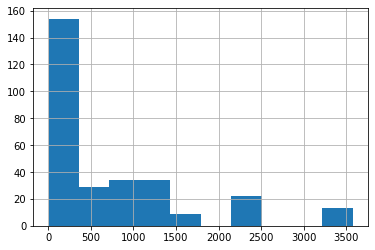

In [122]:
histogram = prod_df[prod_df['FinishedGoodsFlag'] == 1]['ListPrice'].hist(bins=10)
histogram

In [123]:
fig = histogram.get_figure()
# fig.savefig('../docs/finished_goods.jpg')

## Filtering on Multiple Conditions

Here, we will filter on _multiple conditions_. Before, we filtered on rows where Color was Black. We also filtered where FinishedGoodsFlag was equal to 1. Let's see what happens when we filter on *both* simultaneously. 

The format for multiple conditions is:

`df[ (df['col1'] == value1) & (df['col2'] == value2) ]`

Or, more simply:

`df[ (CONDITION 1) & (CONDITION 2) ]`

Which eventually may evaluate to something like:

`df[ True & False ]`

...on a row-by-row basis. If the end result is `False`, the row is omitted.

_Don't forget parentheses in your conditions!_ This is a common mistake.

In [124]:
# Let's look at a table where Color is Black, AND FinishedGoodsFlag is 1
is_black_and_saleable = (prod_df['Color'] == 'Black') & (prod_df['FinishedGoodsFlag'] == 1)

prod_df[is_black_and_saleable].head()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
708,"Sport-100 Helmet, Black",HL-U509,0,1,Black,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{A25A44FB-C2DE-4268-958F-110B8D7621E2},2014-02-08 10:01:36.827000000
722,"LL Road Frame - Black, 58",FR-R38B-58,1,1,Black,500,375,204.6251,337.22,58,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{2140F256-F705-4D67-975D-32DE03265838},2014-02-08 10:01:36.827000000
723,"LL Road Frame - Black, 60",FR-R38B-60,1,1,Black,500,375,204.6251,337.22,60,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{AA95E2A5-E7C4-4B74-B1EA-B52EE3B51537},2014-02-08 10:01:36.827000000
724,"LL Road Frame - Black, 62",FR-R38B-62,1,1,Black,500,375,204.6251,337.22,62,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{5247BE33-50BF-4527-8A30-A39AAE500A8E},2014-02-08 10:01:36.827000000


In [125]:
# Here we have an example of a list price of greater than 50, 
# OR a product size that is not equal to 'XL'

is_gt50_XL = (prod_df['ListPrice'] > 50) | (prod_df['Size'] != 'XL') 
prod_df[is_gt50_XL].head(3).T

ProductID,1,2,3
Name,Adjustable Race,Bearing Ball,BB Ball Bearing
ProductNumber,AR-5381,BA-8327,BE-2349
MakeFlag,0,0,1
FinishedGoodsFlag,0,0,0
Color,NaN,NaN,NaN
SafetyStockLevel,1000,1000,800
ReorderPoint,750,750,600
StandardCost,0.0,0.0,0.0
ListPrice,0.0,0.0,0.0
Size,NaN,NaN,NaN


## Sorting

We can sort the entire DataFrame based on one column in the DataFrame.

In [126]:
# let's sort by standard cost, descending
prod_df.sort_values(by='StandardCost', ascending=False).head(10)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
749,"Road-150 Red, 62",BK-R93R-62,1,1,Red,100,75,2171.2942,3578.27,62,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BC621E1F-2553-4FDC-B22E-5E44A9003569},2014-02-08 10:01:36.827000000
750,"Road-150 Red, 44",BK-R93R-44,1,1,Red,100,75,2171.2942,3578.27,44,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{C19E1136-5DA4-4B40-8758-54A85D7EA494},2014-02-08 10:01:36.827000000
751,"Road-150 Red, 48",BK-R93R-48,1,1,Red,100,75,2171.2942,3578.27,48,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{D10B7CC1-455E-435B-A08F-EC5B1C5776E9},2014-02-08 10:01:36.827000000
752,"Road-150 Red, 52",BK-R93R-52,1,1,Red,100,75,2171.2942,3578.27,52,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{5E085BA0-3CD5-487F-85BB-79ED1C701F23},2014-02-08 10:01:36.827000000
753,"Road-150 Red, 56",BK-R93R-56,1,1,Red,100,75,2171.2942,3578.27,56,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{30819B88-F0D3-4E7A-8105-19F6FAC2CEFB},2014-02-08 10:01:36.827000000
774,"Mountain-100 Silver, 48",BK-M82S-48,1,1,Silver,100,75,1912.1544,3399.99,48,...,M,H,U,1.0,19.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BA5551DF-C9EE-4B43-B3CA-8C19D0F9384D},2014-02-08 10:01:36.827000000
771,"Mountain-100 Silver, 38",BK-M82S-38,1,1,Silver,100,75,1912.1544,3399.99,38,...,M,H,U,1.0,19.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{CA74B54E-FC30-4464-8B83-019BFD1B2DBB},2014-02-08 10:01:36.827000000
772,"Mountain-100 Silver, 42",BK-M82S-42,1,1,Silver,100,75,1912.1544,3399.99,42,...,M,H,U,1.0,19.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BBFFF5A5-4BDC-49A9-A5AD-7584ADFFE808},2014-02-08 10:01:36.827000000
773,"Mountain-100 Silver, 44",BK-M82S-44,1,1,Silver,100,75,1912.1544,3399.99,44,...,M,H,U,1.0,19.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{155FD77E-D6D6-43F0-8A5B-4A8305EB45CD},2014-02-08 10:01:36.827000000


This one is a little more advanced, but it demonstrates a few things:
- Conversion of a `numpy.ndarray` object (return type of `pd.Series.unique()`) into a `pd.Series` object
- `pd.Series.sort_values` with the `by=` kwarg omitted (if only one column is the operand, `by=` doesn't need specified
- Alphabetical sort of a string field, `ascending=True` means A->Z
- Inclusion of nulls, `NaN` in a string field (versus omission with a float/int as prior example)

In [127]:
pd.Series(prod_df['Color'].unique()).sort_values(ascending=False)

7          Yellow
4           White
9    Silver/Black
2          Silver
3             Red
6           Multi
8            Grey
5            Blue
1           Black
0             NaN
dtype: object

## Independent Exercises

Do your best to complete the following prompts. Don't hesitate to look at code we wrote together!

Print the first 4 rows of the whole DataFrame.

In [128]:
# your answer here
prod_df.head(4)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000


How many rows are in the dataframe? Return the answer as an int.

In [129]:
# your answer here
prod_df.shape[0]

504

How many columns? Return the answer as an int.

In [130]:
# your answer here
prod_df.shape[1]

24

How many different product lines are there?

In [131]:
# your answer here
prod_df['ProductLine'].nunique()

4

What are the values of these product lines?

In [132]:
# your answer here
list(prod_df['ProductLine'].unique())

[nan, 'R ', 'S ', 'M ', 'T ']

Do the number of values for the product lines match the number you have using `.nunique()`? Why or why not?

In [133]:
# your answer here
# .nunique ignores NaN by default.

Take the output from your previous answer (using `.unique()`). Select the label corresponding to the `Road` product line using list indexing notation. How many characters are in this string?

In [134]:
# your answer here
print(prod_df['ProductLine'].unique()[1])
len(prod_df['ProductLine'].unique()[1])


R 


2

Do you notice anything odd about this?

In [135]:
# your answer here

# there's a trailing whitespace

How many products are there for the `Road` product line? Don't forget what you just worked on above! Return your answer as an int.

In [136]:
# your answer here
is_road = prod_df['ProductLine'] == 'R '

prod_df[is_road].shape[0]

100

How many products are there in the `Women's` `Mountain` category? Return your answer as an int. _Hint: Use the data dictionary above!_

In [137]:
# your answer here
is_women_mountain = (prod_df['ProductLine'] == 'M ') & (prod_df['Style'] == 'W ')
prod_df[is_women_mountain].shape[0]

11

In [138]:
prod_df[is_women_mountain]

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
867,"Women's Mountain Shorts, S",SH-W890-S,0,1,Black,4,3,26.1763,69.99,S,...,M,NaN,W,22.0,37.0,2013-05-30 00:00:00,NaN,NaN,{22616FD2-B99F-4F7D-ACF6-33DFF66D42D2},2014-02-08 10:01:36.827000000
868,"Women's Mountain Shorts, M",SH-W890-M,0,1,Black,4,3,26.1763,69.99,M,...,M,NaN,W,22.0,37.0,2013-05-30 00:00:00,NaN,NaN,{968E3610-E583-42E8-8AB6-484A799B1774},2014-02-08 10:01:36.827000000
869,"Women's Mountain Shorts, L",SH-W890-L,0,1,Black,4,3,26.1763,69.99,L,...,M,NaN,W,22.0,37.0,2013-05-30 00:00:00,NaN,NaN,{1A66B244-5CA0-4153-B539-AE048D14FAEC},2014-02-08 10:01:36.827000000
904,"ML Mountain Frame-W - Silver, 40",FR-M63S-40,1,1,Silver,500,375,199.3757,364.09,40,...,M,M,W,12.0,15.0,2013-05-30 00:00:00,NaN,NaN,{A7DDE43E-F7D5-4075-A0C1-C866AD7AA154},2014-02-08 10:01:36.827000000
905,"ML Mountain Frame-W - Silver, 42",FR-M63S-42,1,1,Silver,500,375,199.3757,364.09,42,...,M,M,W,12.0,15.0,2013-05-30 00:00:00,NaN,NaN,{D4A2FCAD-1E63-4EBD-863C-5A7C48D5B8D9},2014-02-08 10:01:36.827000000
906,"ML Mountain Frame-W - Silver, 46",FR-M63S-46,1,1,Silver,500,375,199.3757,364.09,46,...,M,M,W,12.0,15.0,2013-05-30 00:00:00,NaN,NaN,{82025C63-7B28-412D-92C1-408E0E6AE646},2014-02-08 10:01:36.827000000
942,"ML Mountain Frame-W - Silver, 38",FR-M63S-38,1,1,Silver,500,375,199.3757,364.09,38,...,M,M,W,12.0,15.0,2013-05-30 00:00:00,NaN,NaN,{BA3646B0-1487-426E-AB4E-57D42E6F9233},2014-02-08 10:01:36.827000000
980,"Mountain-400-W Silver, 38",BK-M38S-38,1,1,Silver,100,75,419.7784,769.49,38,...,M,M,W,1.0,22.0,2013-05-30 00:00:00,NaN,NaN,{7A927632-99A4-4F24-ADCE-0062D2D113D9},2014-02-08 10:01:36.827000000
981,"Mountain-400-W Silver, 40",BK-M38S-40,1,1,Silver,100,75,419.7784,769.49,40,...,M,M,W,1.0,22.0,2013-05-30 00:00:00,NaN,NaN,{0A72791C-A984-4733-AE4E-2B4373CFD7CD},2014-02-08 10:01:36.827000000


**Challenge:** What are the top 3 _most expensive list price_ product that are either in the `Women's` `Mountain` category, _OR_ `Silver` in `Color`? Return your answer as a DataFrame object, with the `ProductID` index, `Name` relabeled as `NewName`, and `ListPrice` columns. Perform the statement in one execution, and do not mutate the source DataFrame.

In [139]:
# your answer here
# create boolean indices
is_women_mountain = (prod_df['ProductLine'] == 'M ') & (prod_df['Style'] == 'W ')
is_silver = prod_df['Color'] == 'Silver'

is_wm_silver = is_women_mountain | is_silver

# create placeholders for column name lists and dictionaries
cols = ['Name', 'ListPrice']
new_cols = {'Name': 'NewName'}

prod_df[is_wm_silver].sort_values(by='ListPrice', ascending=False).head(3)[cols].rename(columns=new_cols)

,NewName,ListPrice
ProductID,,
774,"Mountain-100 Silver, 48",3399.99
771,"Mountain-100 Silver, 38",3399.99
772,"Mountain-100 Silver, 42",3399.99


## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index

# selecting columns
df.column_name
df['column_name']

# renaming columns
df.rename({'old_name':'new_name'}, inplace=True)
df.columns = ['new_column_a', 'new_column_b']

# notable columns operations
df.describe() # five number summary
df['col1'].nunique() # number of unique values
df['col1'].value_counts() # number of occurrences of each value in column

# filtering
df[ df['col1'] < 50 ] # filter column to be less than 50
df[ (df['col1'] == value1) & (df['col2'] > value2) ] # filter column where col1 is equal to value1 AND col2 is greater to value 2

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼


